In [2]:
import cv2
import os
import random

def shrink_and_paste_all_objects(img, label_path, output_img_dir, output_lbl_dir, scale_range=(0.2, 0.5)):
    os.makedirs(output_img_dir, exist_ok=True)
    os.makedirs(output_lbl_dir, exist_ok=True)

    h, w, _ = img.shape

    with open(label_path, 'r') as f:
        lines = f.readlines()

    # Create a copy of the original image to paste all objects onto
    new_img = img.copy()
    new_labels = []

    for line in lines:
        cls, cx, cy, bw, bh = map(float, line.strip().split())

        # Convert YOLO to pixel coordinates
        x1 = int((cx - bw / 2) * w)
        y1 = int((cy - bh / 2) * h)
        x2 = int((cx + bw / 2) * w)
        y2 = int((cy + bh / 2) * h)

        # Crop object
        obj_crop = img[y1:y2, x1:x2]
        if obj_crop.size == 0:
            continue

        # Resize
        scale = random.uniform(*scale_range)
        new_w = int((x2 - x1) * scale)
        new_h = int((y2 - y1) * scale)
        if new_w == 0 or new_h == 0:
            continue
        obj_crop = cv2.resize(obj_crop, (new_w, new_h))

        # Random paste location
        max_x = w - new_w
        max_y = h - new_h
        paste_x = random.randint(0, max_x)
        paste_y = random.randint(0, max_y)

        # Paste
        new_img[paste_y:paste_y + new_h, paste_x:paste_x + new_w] = obj_crop

        # Compute new YOLO label
        new_cx = (paste_x + new_w / 2) / w
        new_cy = (paste_y + new_h / 2) / h
        new_bw = new_w / w
        new_bh = new_h / h
        new_labels.append(f"{int(cls)} {new_cx:.6f} {new_cy:.6f} {new_bw:.6f} {new_bh:.6f}")

    # Save only if new labels exist
    if new_labels:
        base_name = os.path.splitext(os.path.basename(label_path))[0]
        new_name = f"{base_name}_aug.jpg"

        cv2.imwrite(os.path.join(output_img_dir, new_name), new_img)
        with open(os.path.join(output_lbl_dir, new_name.replace(".jpg", ".txt")), "w") as f_out:
            f_out.write("\n".join(new_labels) + "\n")


In [7]:
import cv2
import os
import random

def shrink_and_paste_all_objects(img, label_path, output_img_dir, output_lbl_dir, scale_range=(0.2, 0.5)):
    os.makedirs(output_img_dir, exist_ok=True)
    os.makedirs(output_lbl_dir, exist_ok=True)

    h, w, _ = img.shape

    with open(label_path, 'r') as f:
        lines = f.readlines()

    # Create a copy of the original image to paste all objects onto
    new_img = img.copy()
    new_labels = []

    for line in lines:
        cls, cx, cy, bw, bh = map(float, line.strip().split())

        # Convert YOLO to pixel coordinates
        x1 = int((cx - bw / 2) * w)
        y1 = int((cy - bh / 2) * h)
        x2 = int((cx + bw / 2) * w)
        y2 = int((cy + bh / 2) * h)

        # Crop object
        obj_crop = img[y1:y2, x1:x2]
        if obj_crop.size == 0:
            continue

        # Resize
        scale = random.uniform(*scale_range)
        new_w = int((x2 - x1) * scale)
        new_h = int((y2 - y1) * scale)
        if new_w == 0 or new_h == 0:
            continue
        obj_crop = cv2.resize(obj_crop, (new_w, new_h))

        # Random paste location
        max_x = w - new_w
        max_y = h - new_h
        paste_x = random.randint(0, max_x)
        paste_y = random.randint(0, max_y)

        # Paste
        new_img[paste_y:paste_y + new_h, paste_x:paste_x + new_w] = obj_crop

        # Compute new YOLO label
        new_cx = (paste_x + new_w / 2) / w
        new_cy = (paste_y + new_h / 2) / h
        new_bw = new_w / w
        new_bh = new_h / h
        new_labels.append(f"{int(cls)} {new_cx:.6f} {new_cy:.6f} {new_bw:.6f} {new_bh:.6f}")

    # Always save the augmented image and label file (empty if no objects)
    base_name = os.path.splitext(os.path.basename(label_path))[0]
    new_name = f"{base_name}_aug.jpg"

    cv2.imwrite(os.path.join(output_img_dir, new_name), new_img)

    with open(os.path.join(output_lbl_dir, new_name.replace(".jpg", ".txt")), "w") as f_out:
        if new_labels:
            f_out.write("\n".join(new_labels) + "\n")
        else:
            # Write empty label file
            f_out.write("")


In [8]:
input_img_dir = "json_dataset/images"
input_lbl_dir = "yaml_dataset2/labels/annotations"
output_img_dir = "shrinked_dataset/images/"
output_lbl_dir = "shrinked_dataset/labels/"

os.makedirs(output_img_dir, exist_ok=True)
os.makedirs(output_lbl_dir, exist_ok=True)


In [9]:
#Execute data aug
from tqdm import tqdm

for img_file in tqdm(os.listdir(input_img_dir), "sucking balls"):
    if not img_file.endswith((".jpg", ".png")):
        continue
    img_path = os.path.join(input_img_dir, img_file)
    label_path = os.path.join(input_lbl_dir, img_file.replace(".jpg", ".txt").replace(".png", ".txt"))

    img = cv2.imread(img_path)
    shrink_and_paste_all_objects(img, label_path, output_img_dir, output_lbl_dir)


sucking balls: 100%|██████████| 20000/20000 [28:59<00:00, 11.50it/s] 


In [10]:
ori_label_dir = "yaml_dataset2/labels/annotations"
new_label_dir = "shrinked_dataset/labels/"

for txt_file in os.listdir(ori_label_dir):
    file_path = os.path.join(ori_label_dir, txt_file)
    if os.path.isfile(file_path):
        print("Processing:", txt_file)
        file_num = txt_file.rstrip(".txt")
        with open(file_path,'r') as f:
            text = f.read().strip()
            aug_file = f"{file_num}_aug.txt"
            with open(os.path.join(new_label_dir,aug_file), 'a') as f2:
                f2.write(text)
                
            

Processing: 2018.txt
Processing: 1870.txt
Processing: 11028.txt
Processing: 12088.txt
Processing: 9559.txt
Processing: 18800.txt
Processing: 3411.txt
Processing: 9766.txt
Processing: 1831.txt
Processing: 12572.txt
Processing: 816.txt
Processing: 17521.txt
Processing: 12205.txt
Processing: 8450.txt
Processing: 18947.txt
Processing: 5503.txt
Processing: 6629.txt
Processing: 14122.txt
Processing: 13733.txt
Processing: 8613.txt
Processing: 18798.txt
Processing: 10820.txt
Processing: 13244.txt
Processing: 2439.txt
Processing: 15011.txt
Processing: 14684.txt
Processing: 5895.txt
Processing: 11166.txt
Processing: 4850.txt
Processing: 13648.txt
Processing: 308.txt
Processing: 15372.txt
Processing: 7448.txt
Processing: 13822.txt
Processing: 8121.txt
Processing: 16411.txt
Processing: 14006.txt
Processing: 3827.txt
Processing: 9041.txt
Processing: 4476.txt
Processing: 5011.txt
Processing: 7888.txt
Processing: 4861.txt
Processing: 16136.txt
Processing: 13892.txt
Processing: 12995.txt
Processing: 1

In [11]:
#Verify aug results

import cv2
import matplotlib.pyplot as plt

def show_image_with_boxes(image_path, label_path):
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Could not read image: {image_path}")
        return

    h, w, _ = img.shape

    # Read YOLO-format labels
    with open(label_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        cls, cx, cy, bw, bh = map(float, line.strip().split())

        # Convert YOLO to pixel coords
        x1 = int((cx - bw / 2) * w)
        y1 = int((cy - bh / 2) * h)
        x2 = int((cx + bw / 2) * w)
        y2 = int((cy + bh / 2) * h)

        # Draw rectangle and label
        cv2.rectangle(img, (x1, y1), (x2, y2), color=(0, 255, 0), thickness=2)
        cv2.putText(img, str(int(cls)), (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 
                    0.6, (0, 255, 0), 2)

    # Convert BGR (OpenCV) to RGB (matplotlib)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Show image
    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Image: {image_path}")
    plt.show()


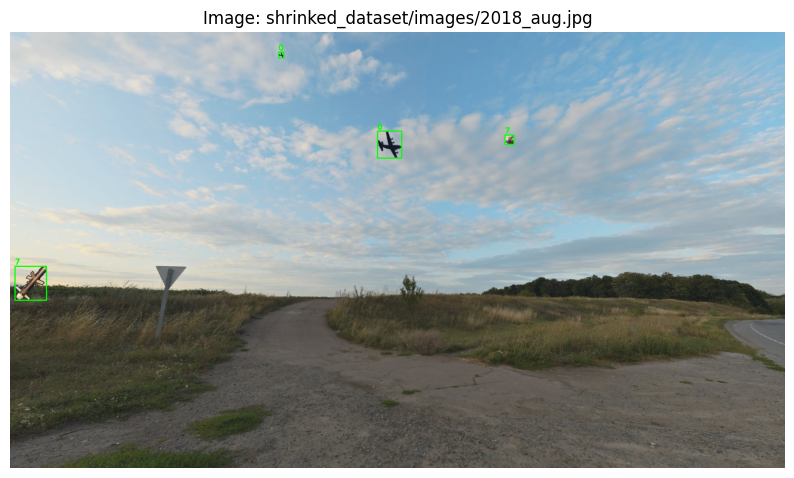

In [12]:
show_image_with_boxes("shrinked_dataset/images/2018_aug.jpg", "shrinked_dataset/labels/2018_aug.txt")
